#Importing Required Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#Input Image

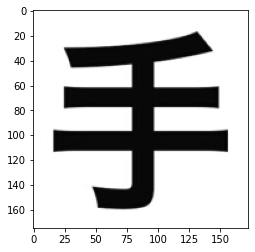

In [2]:
path = "../img/sample1.bmp"
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, "gray")
plt.show()

#Thresholding input image to create a binary image

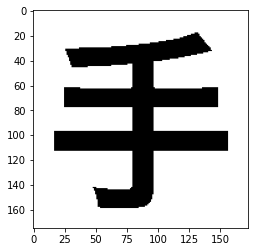

In [3]:
t,img_t = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)
img_t = img_t//255
img_t = img_t.astype(np.uint8)
plt.imshow(img_t, "gray")
plt.show()

#Inversing the binary image

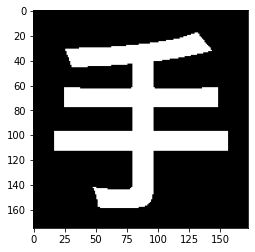

In [4]:
img_t = 1 - img_t
plt.imshow(img_t, "gray")
plt.show()

#Defining kernel

In [5]:
kernel = np.ones((3,3), np.uint8)


#Operation to extract the skeleton of the image

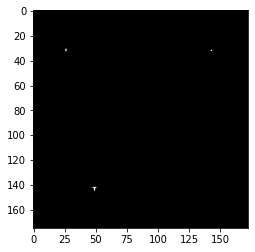

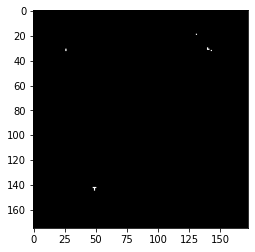

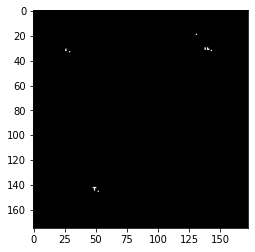

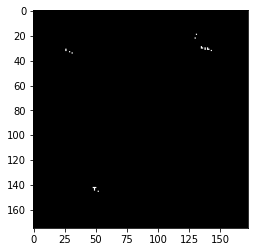

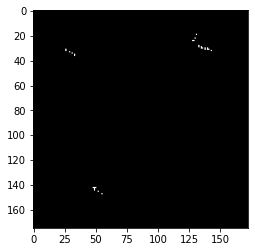

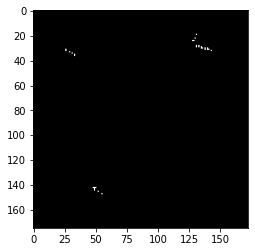

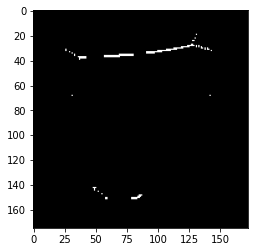

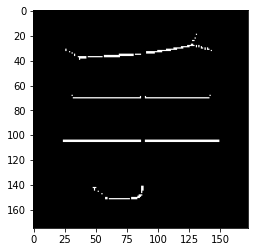

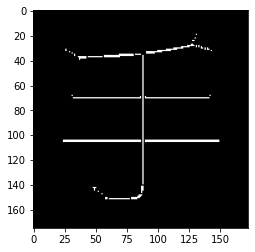

In [6]:
output = np.zeros((img.shape),np.uint8)
k = 0
while(True):
    X = cv2.erode(img_t, kernel, iterations=k).astype(np.uint8)
    summ = np.sum(X)

    if summ==0:
        break

    opening = cv2.morphologyEx(X, cv2.MORPH_OPEN, kernel).astype(np.uint8)
    Y = X - opening
    output = np.bitwise_or(output, Y)
    k+=1
    
    

#Skeleton of the image

Text(0.5, 1.0, 'Skeleton of the Image')

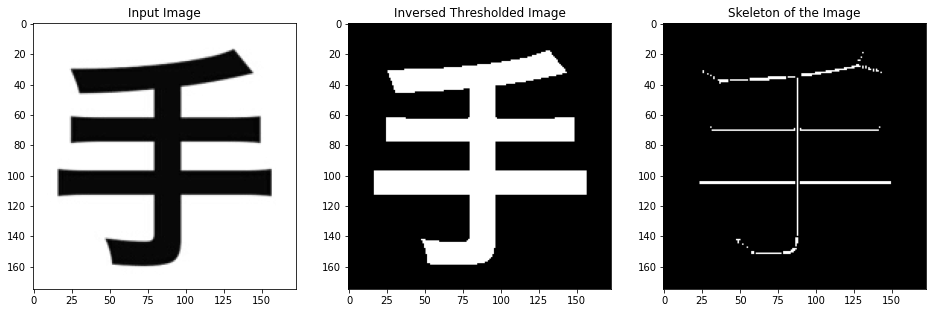

In [7]:
figure, axis = plt.subplots(1,3, figsize=(16, 5))
axis[0].imshow(img, "gray")
axis[0].set_title("Input Image")

axis[1].imshow(img_t,"gray")
axis[1].set_title("Inversed Thresholded Image")
axis[2].imshow(output,"gray")
axis[2].set_title("Skeleton of the Image")